In [41]:
'''
RL to capture a hidden flag
'''
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Grid environment 
COL = 10 ## 6 10 12. 15 fail # after adding max_steps 15/20/50 is fine
ROW = 10 ## 4 10 12. 15 fail

NUM_STATES = COL * ROW
NUM_ACTIONS = 4 # up down left right

FLAG_STATE = 13 # preset flag location. Must be less than COL * ROW

REWARD_FAIL = -10
REWARD_SUCCCESS = 100

## convert state to row and column
def getStateToRC(state):
    r = state // COL ## col
    c = state % COL
    return r, c

## get state from row and column
def getRCToState(r, c):
    return int(r*COL + c)

## step function
def xp_step(state, action):
    r, c = getStateToRC(state)
    
    if (r > 0 and action == 0): ## 4 actions: up down left right
        r-=1
    if (r < ROW-1 and action == 1):
        r+=1
    if (c > 1 and action == 2):
        c-=1
    if (c < COL-1 and action == 3):
        c+=1

    state_new = getRCToState(r, c)
    done = False
    
    reward = REWARD_FAIL
    
    if (state_new == FLAG_STATE):  ## fixed place
        done = True
        reward = REWARD_SUCCCESS
        
    return state_new, reward, done


env = []

MAX_STEPS = 50*(COL + ROW)/2 # max tries in one episode

# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, 
                          size = (NUM_STATES, NUM_ACTIONS)) 
    
    # Initialize variables to track rewards
    reward_list = []
    avg_reward_list = []
    
    # Calculate episodic decay in epsilon
    decay = (epsilon - min_eps)/episodes
    
        # Run Q learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        total_reward, reward = 0, 0
        state = np.random.randint(0, NUM_STATES -1) # random
        
        j = 0
        while done != True:
            j+=1
            if j> MAX_STEPS:
                break;
                
            # Determine the next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state]) 
            else:
                action = np.random.randint(0, NUM_ACTIONS -1) 
                
            # Get next state and reward
            state_new, reward, done = xp_step(state, action) 
 
            #Allow for terminal states
            if done:
                Q[state, action] = reward
                total_reward += reward
                break
                
            # Adjust Q value for current state
            else:
                delta = learning * (reward + discount * np.max(Q[state_new]) - Q[state, action])
                Q[state, action] += delta
                                     
            # Update variables
            total_reward += reward
            state = state_new
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= decay
        
        # Track rewards
        reward_list.append(total_reward)
        
        if (i+1) % 100 == 0: # sample rewards
            avg_reward = np.mean(reward_list)
            avg_reward_list.append(avg_reward)
            reward_list = []
            
        if (i+1) % 100 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, avg_reward))
            
    # env.close()
    
    return avg_reward_list, Q



In [43]:
# Run Q-learning algorithm
rewards, Q = QLearning(env, 0.2, 0.9, 0.8, 0, 10000)

Episode 100 Average Reward: -691.8
Episode 200 Average Reward: -656.6
Episode 300 Average Reward: -441.7
Episode 400 Average Reward: -451.9
Episode 500 Average Reward: -429.5
Episode 600 Average Reward: -386.1
Episode 700 Average Reward: -286.5
Episode 800 Average Reward: -317.1
Episode 900 Average Reward: -260.5
Episode 1000 Average Reward: -266.2
Episode 1100 Average Reward: -248.6
Episode 1200 Average Reward: -219.9
Episode 1300 Average Reward: -198.7
Episode 1400 Average Reward: -241.9
Episode 1500 Average Reward: -183.5
Episode 1600 Average Reward: -205.0
Episode 1700 Average Reward: -224.3
Episode 1800 Average Reward: -162.6
Episode 1900 Average Reward: -153.4
Episode 2000 Average Reward: -137.8
Episode 2100 Average Reward: -155.4
Episode 2200 Average Reward: -105.8
Episode 2300 Average Reward: -154.9
Episode 2400 Average Reward: -106.0
Episode 2500 Average Reward: -103.0
Episode 2600 Average Reward: -95.0
Episode 2700 Average Reward: -95.2
Episode 2800 Average Reward: -78.6
Epis

Text(0.5, 1.0, 'Average Reward vs Episodes')

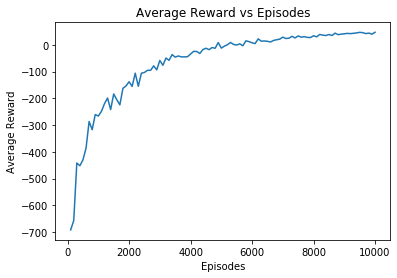

In [44]:
# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
# plt.savefig('rewards.jpg')     
# plt.close()  

In [45]:
print (Q)

[[ 31.14241537  44.54433469  31.18661834  45.8       ]
 [ 45.8         62.          45.8         -2.23487766]
 [ 62.          80.          45.8          0.76156173]
 [ 79.99724547 100.          61.99785584  -0.72613554]
 [ 61.99999999  80.          80.          -0.91416481]
 [ 45.79999921  62.          61.99999995  -0.38324452]
 [ 31.22        45.8         45.8         -4.06951229]
 [ 18.09796865  31.21999889  31.22        -0.12568914]
 [  6.28810404  18.09753336  18.098       -4.83664812]
 [ -4.49357049   6.27060261   6.2882      -8.06137335]
 [ 31.16534812  31.11203931  45.32273291  61.99999964]
 [ 45.8         45.8         62.          80.        ]
 [ 62.          62.          62.         100.        ]
 [ 77.20998876  79.99999941  77.77154553   0.34915382]
 [ 62.          62.         100.           0.86740346]
 [ 45.8         45.8         80.          -1.10887104]
 [ 31.22        31.22        62.           0.88885506]
 [ 18.09799999  18.09799991  45.8         -2.28192416]
 [  6.2876

In [46]:
## See a smart agent
## 
for i in range(5):
    state = np.random.randint(0, NUM_STATES -1) # random
    print(f"{i}::Start:{state}")
    
    for j in range(200):
        action = np.argmax(Q[state]) 
        print(f"{j}::action:{action}")
        state, reward, done = xp_step(state, action)
        
        end = state
        if done:
            print(f"Reward:{reward} at {end}")
            break 

0::Start:69
0::action:0
1::action:2
2::action:2
3::action:2
4::action:0
5::action:2
6::action:2
7::action:0
8::action:0
9::action:2
10::action:0
Reward:100 at 13
1::Start:37
0::action:2
1::action:2
2::action:2
3::action:0
4::action:2
5::action:0
Reward:100 at 13
2::Start:4
0::action:1
1::action:2
Reward:100 at 13
3::Start:45
0::action:2
1::action:0
2::action:0
3::action:2
4::action:0
Reward:100 at 13
4::Start:7
0::action:2
1::action:1
2::action:2
3::action:2
4::action:2
Reward:100 at 13
